# Red Wine Quality Prediction

In [292]:
# Importing main required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.random import randn
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.metrics import roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
plt.style.use('fivethirtyeight') # Good looking plots
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import logit, probit, poisson, ols
from sklearn import datasets




# Not to display warnings.

import warnings
warnings.filterwarnings('ignore')

### Data Input

In [293]:
# Read the given data set
data=pd.read_csv('/Users/rakeshchandramaity/Desktop/ml/winequality_red.csv')

In [294]:
## Keeping our raw data safe in 'data' data frame. As we are now going to work with 'df'data frame.

df=data

### Data Analysis

In [295]:
# Head Checking
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [296]:
# Tail Checking
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [297]:
# Checking the Head & Tril to get an over all Idea about the data.

### First Cut Observations on the Data:

In [298]:
# Understanding the row & column numbers
df.shape

(1599, 12)

### Observation : Not a Big Data Set to most need to take care the Data Loss Aspect.

In [299]:
# Checking that if all the values are numerical or not
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [300]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [301]:
#Checking for missing/null values.
df.isnull().sum()  

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [302]:
##  Now checking Corelation 
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

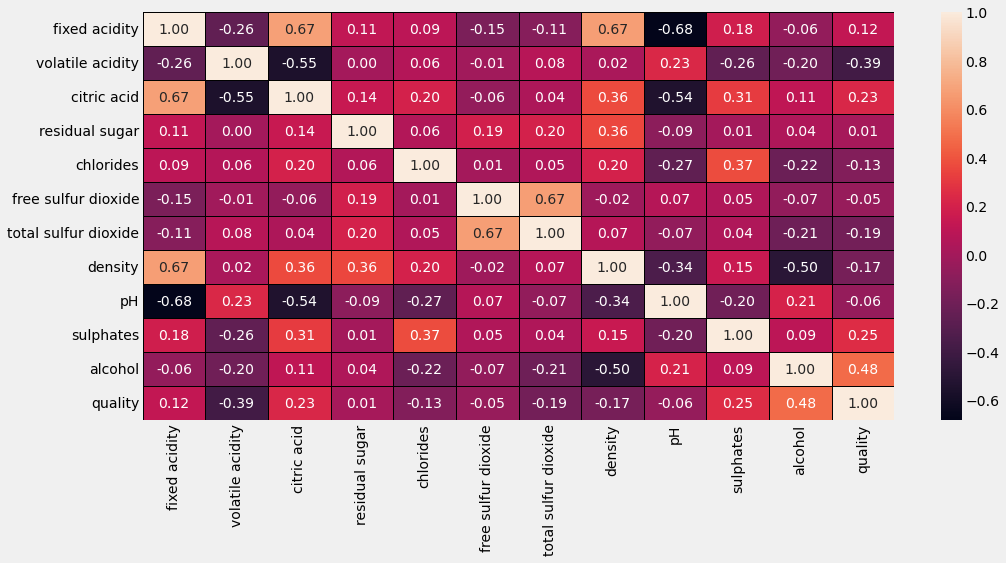

In [303]:
##  Now checking Corelation with the help og Hit Map
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt= '.2f')

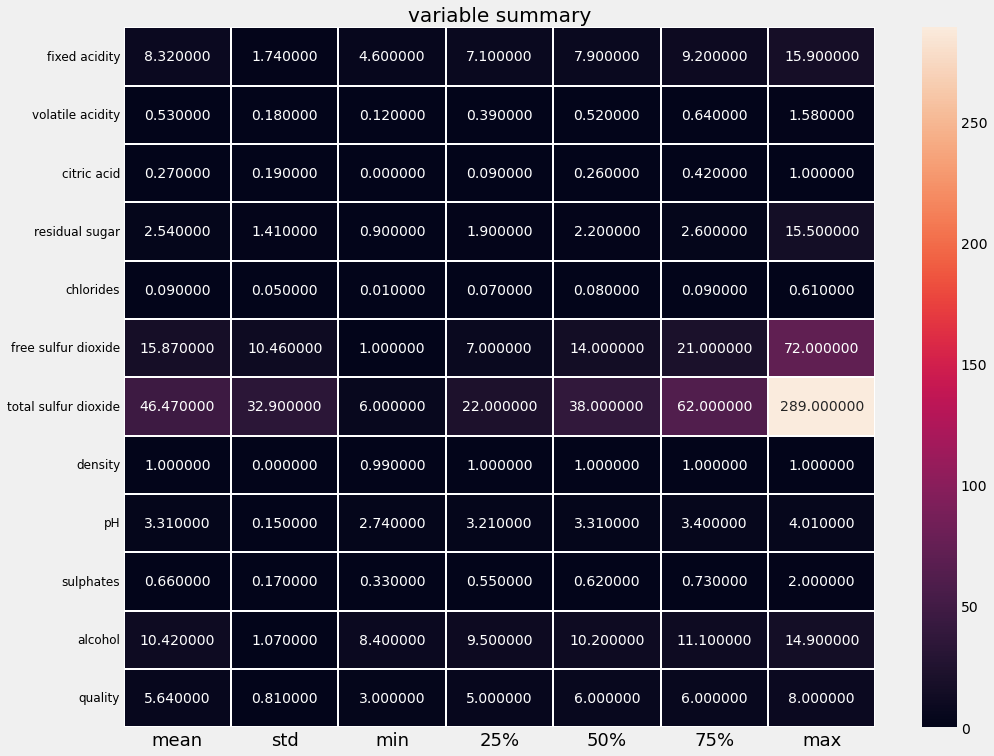

In [304]:
## Need to Check Distributions of Variables with in a hit map.
## Which will give us clear understanding about the variables.

plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("variable summary")
plt.show()

In [305]:
## Now as beacuse of we need to focus the Redwine quality good or Bad then cheking the mean values with Respect to quality.

df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [306]:
# So now checking all the data are in numeric form or Not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [307]:
# checking the columns of the data
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## Enhanced Data Analysis:

In [308]:
#df = df.astype('category')
#df.dtypes

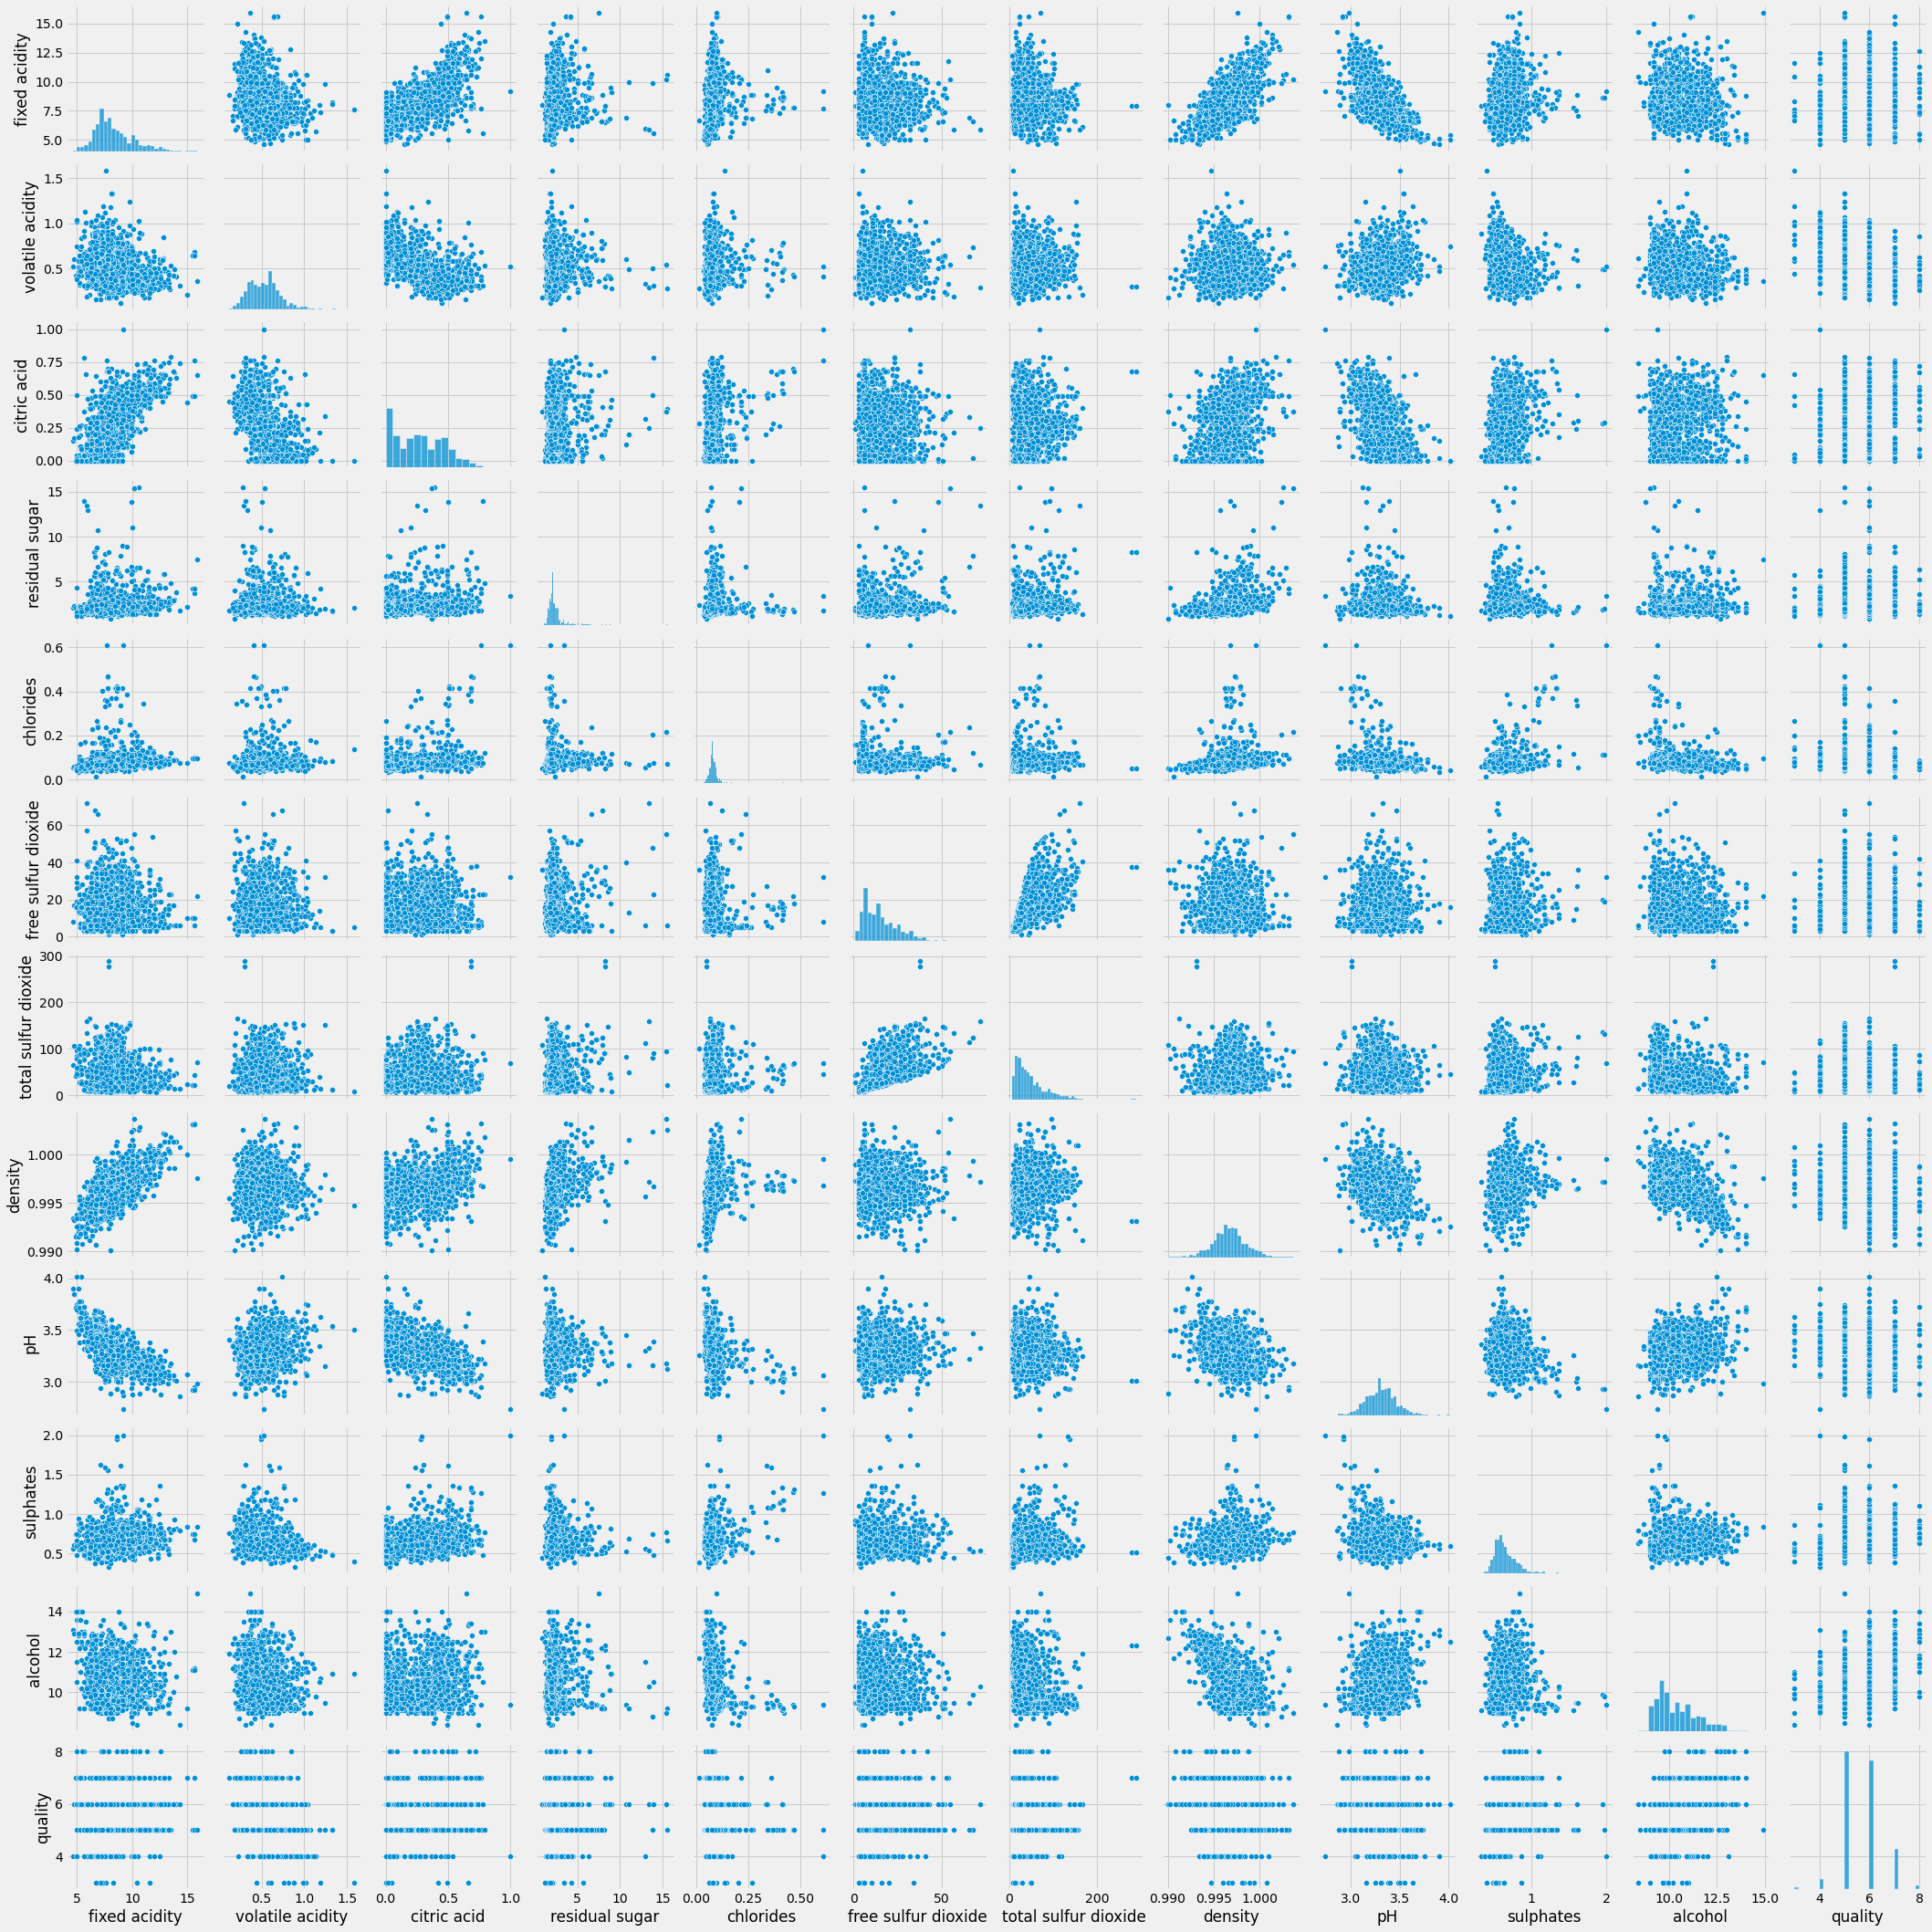

In [309]:
#pairplot
import seaborn as sns
sns.pairplot(df)

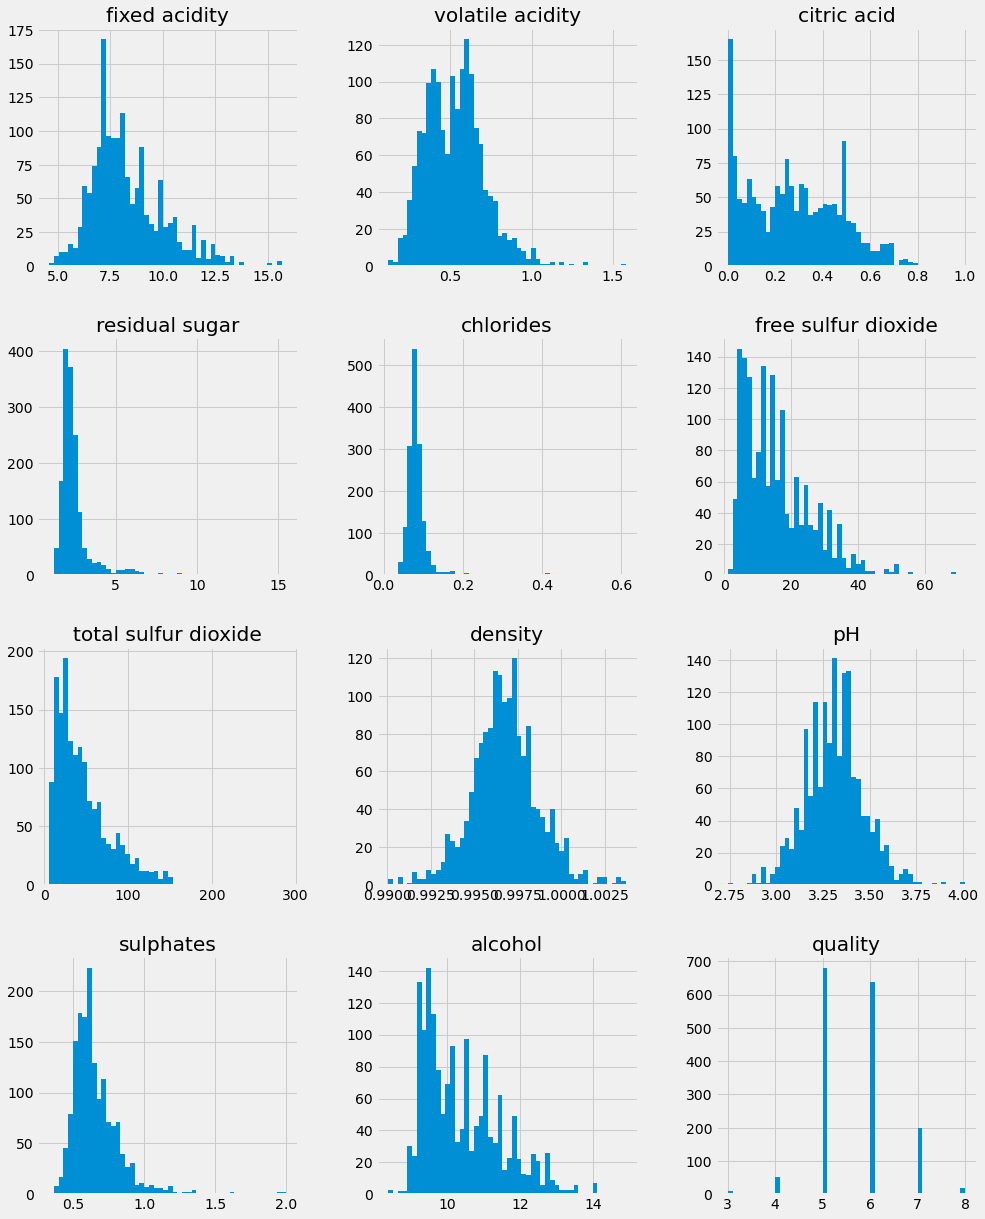

In [310]:
df.hist(figsize=(15,20),bins=50)
plt.show()

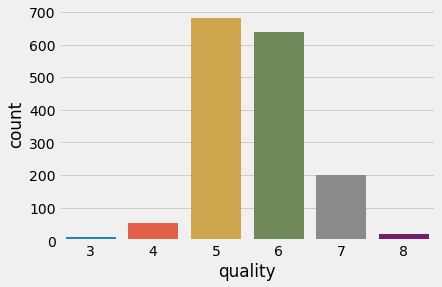

In [311]:
sns.countplot(df['quality'])
plt.show()

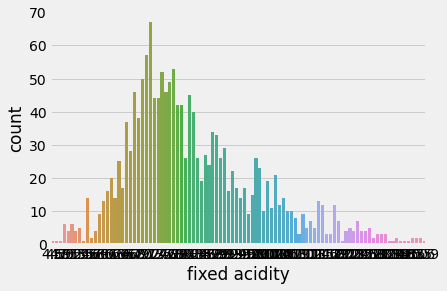

In [312]:
sns.countplot(df['fixed acidity'])
plt.show()

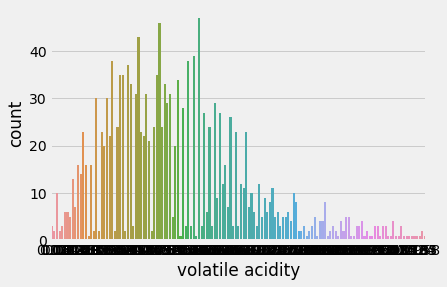

In [313]:
sns.countplot(df['volatile acidity'])
plt.show()

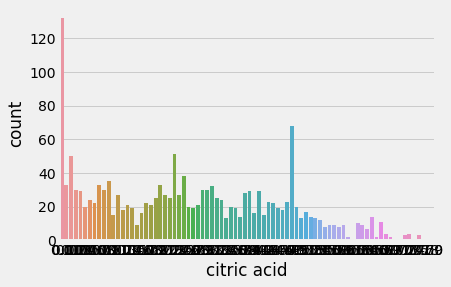

In [314]:
sns.countplot(df['citric acid'])
plt.show()

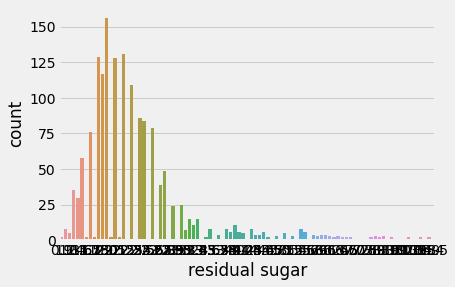

In [315]:
sns.countplot(df['residual sugar'])
plt.show()

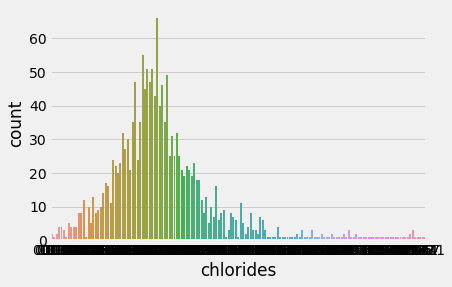

In [316]:
sns.countplot(df['chlorides'])
plt.show()

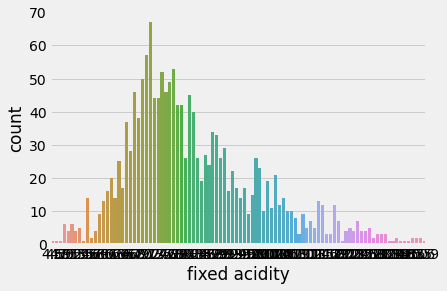

In [317]:
sns.countplot(df['fixed acidity'])
plt.show()

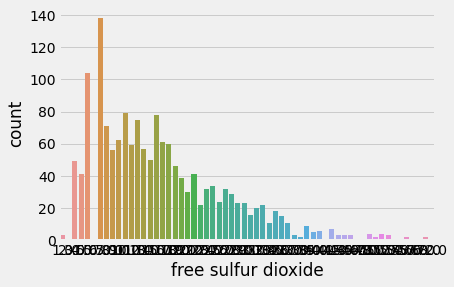

In [318]:
sns.countplot(df['free sulfur dioxide'])
plt.show()

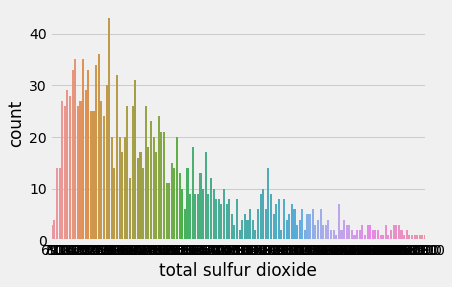

In [319]:
sns.countplot(df['total sulfur dioxide'])
plt.show()

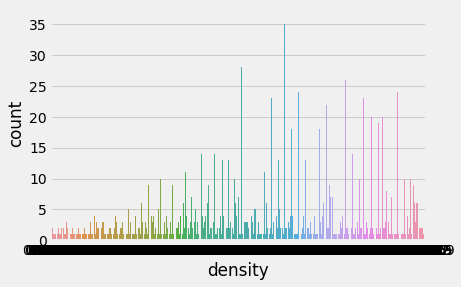

In [320]:
sns.countplot(df['density'])
plt.show()

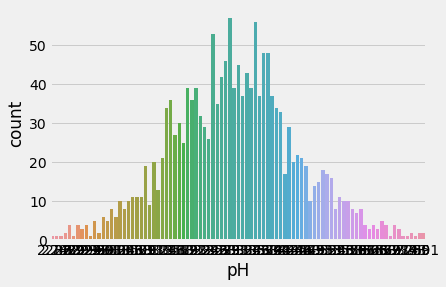

In [321]:
sns.countplot(df['pH'])
plt.show()

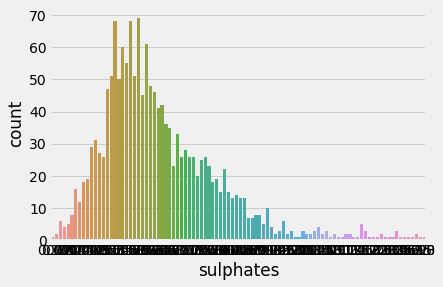

In [322]:
sns.countplot(df['sulphates'])
plt.show()

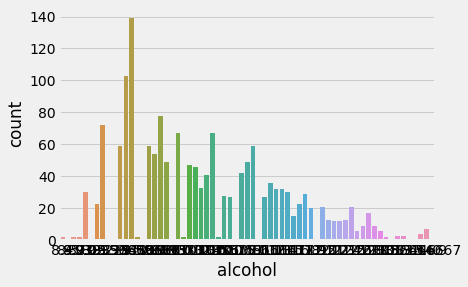

In [323]:
sns.countplot(df['alcohol'])
plt.show()

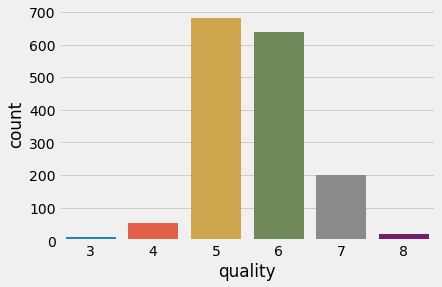

In [324]:
sns.countplot(df['quality'])
plt.show()

# KDE Plot :

<AxesSubplot:xlabel='quality', ylabel='Density'>

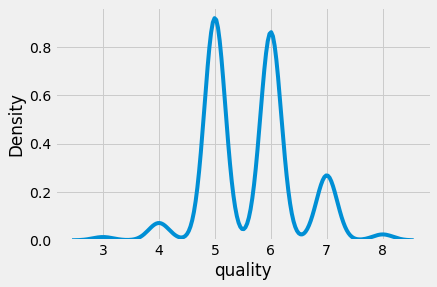

In [325]:
sns.kdeplot(df.query('quality > 2').quality)

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

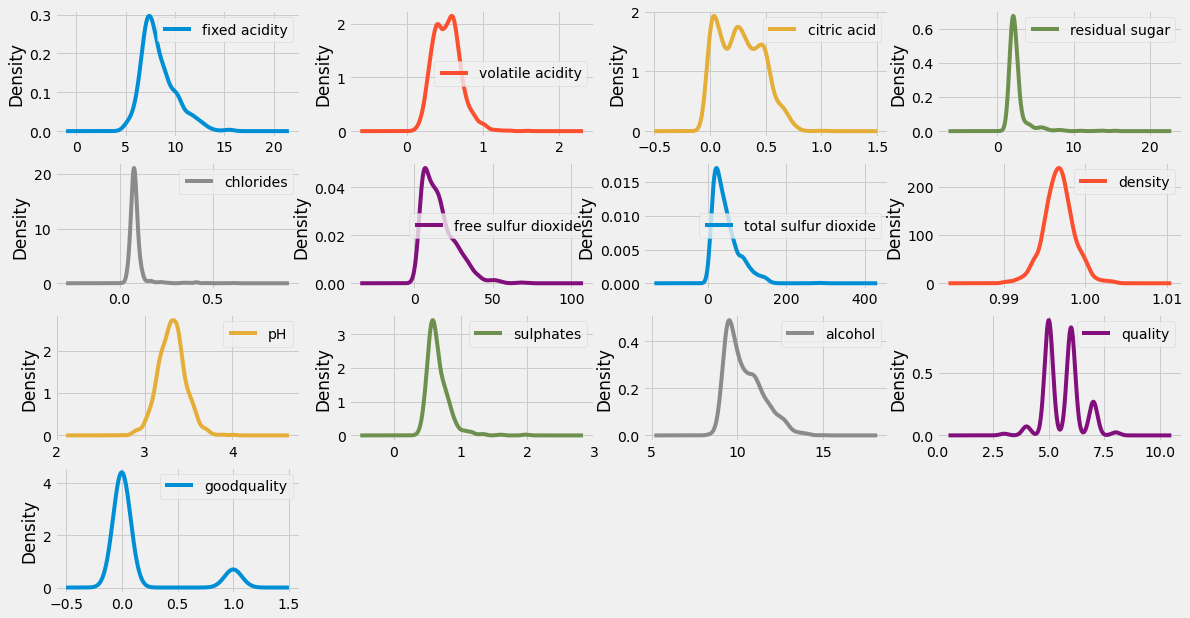

In [389]:
df.plot(kind ='density',subplots = True, layout =(4,4),sharex = False)

Text(0.5, 1.0, 'sulphates vs alcohol')

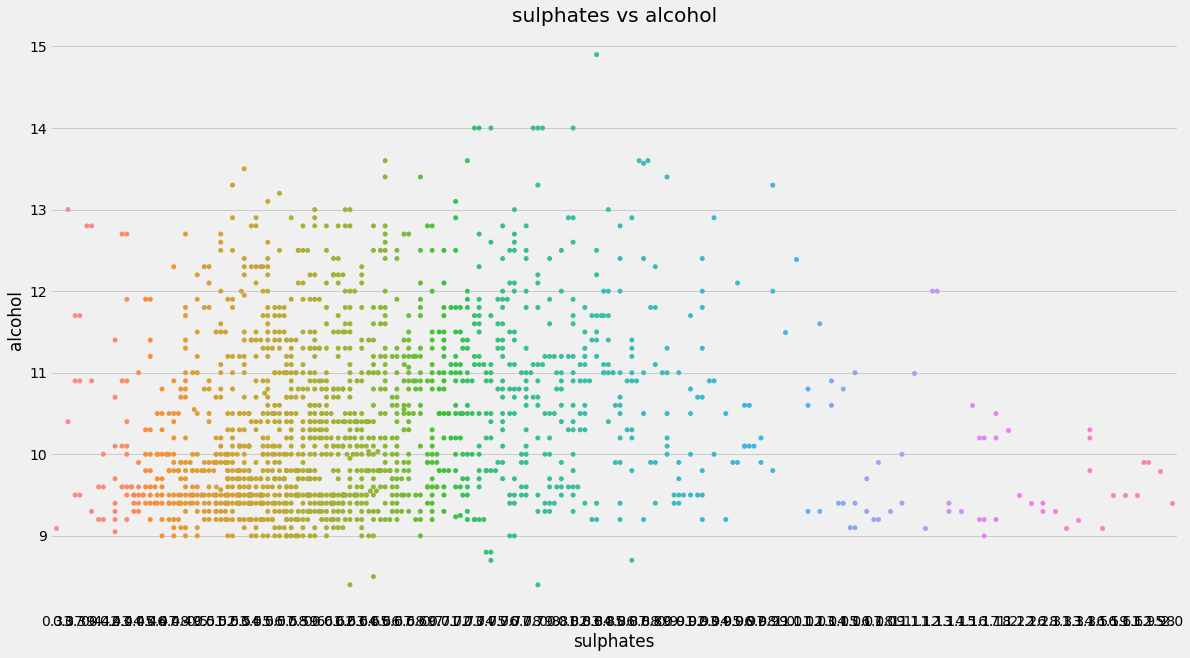

In [332]:
# Sulphates vs Alcohol ...it's Important as its a KEY Component

plt.rcParams['figure.figsize'] = (18, 10)
sns.swarmplot(df['sulphates'], df['alcohol'])
plt.title('sulphates vs alcohol')

In [333]:
#Getting summary metrics for the dataframe
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [334]:
#Checking for missing/null values
df.select_dtypes(include=['object']).isnull().sum()
df.select_dtypes(include=[np.number]).isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Now from below we will check the ditribution of datas.

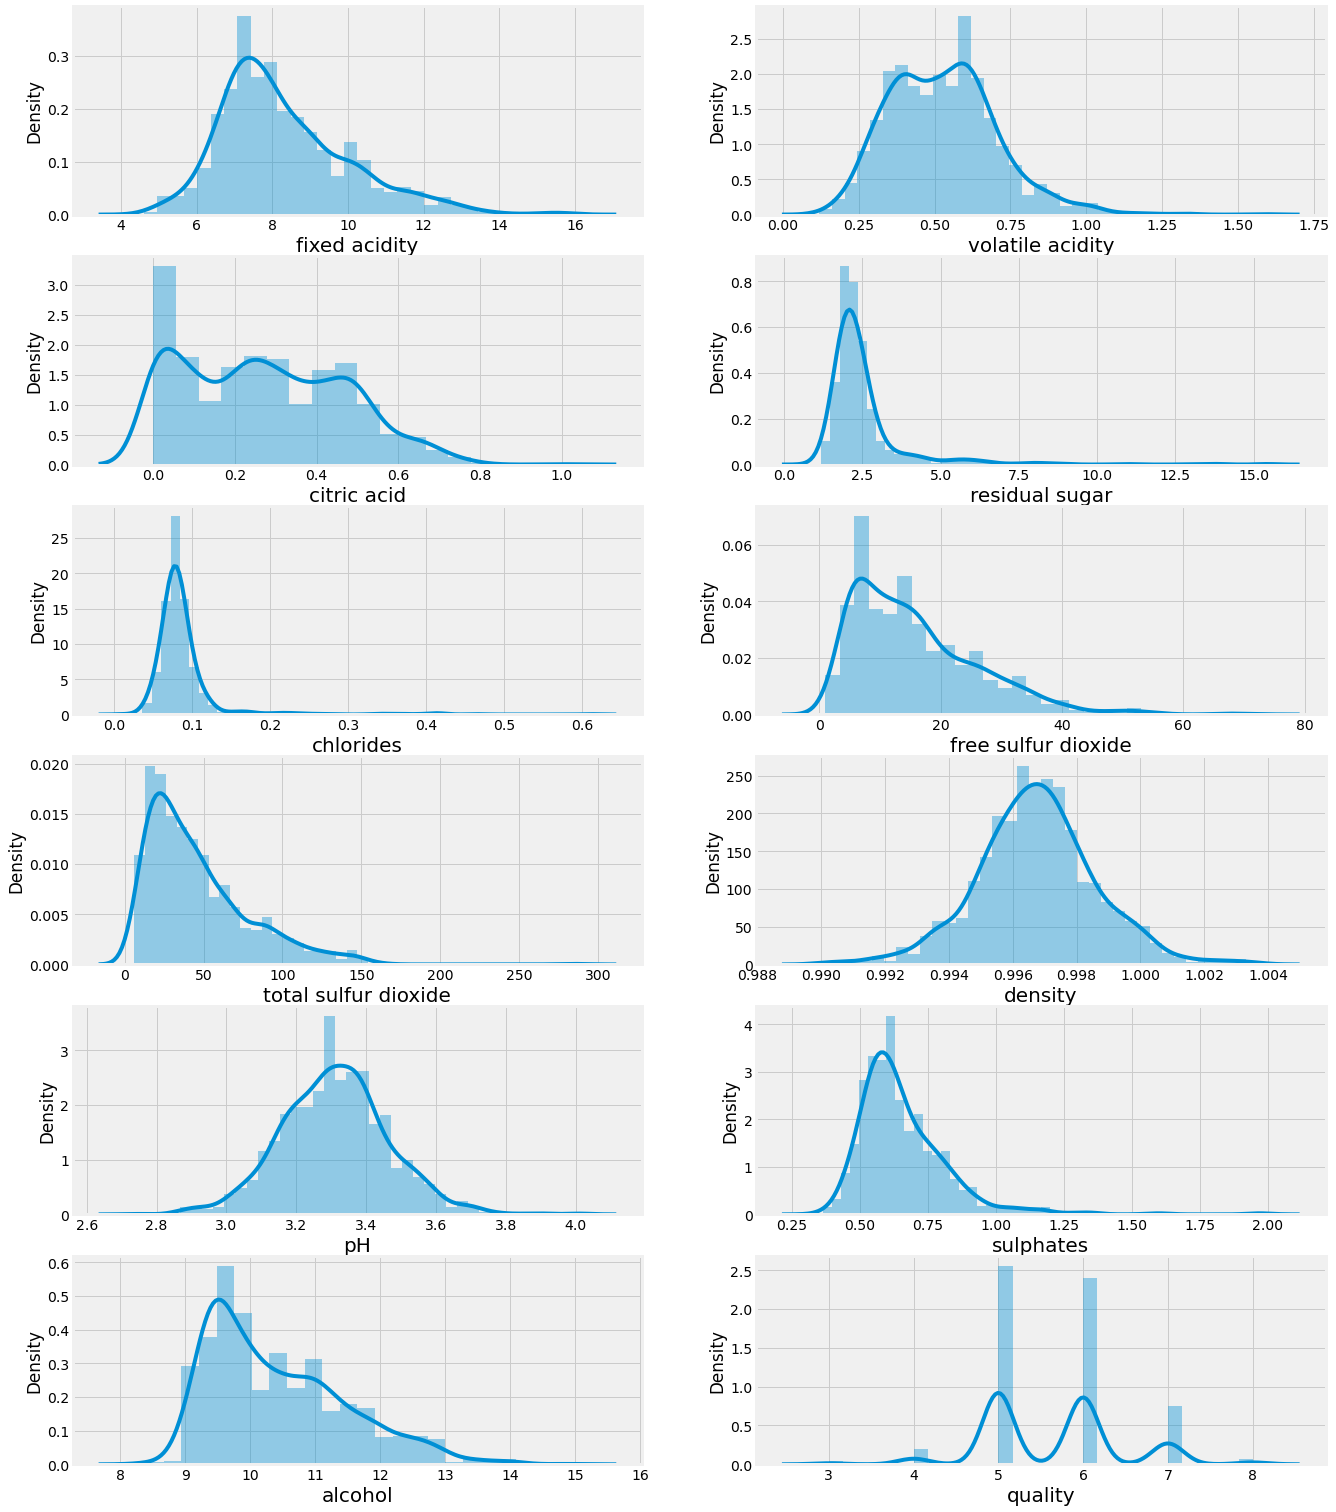

In [335]:
#let's see how data is dustributed for every column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=12:
        ax = plt.subplot(6,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()  

### Observation :: It's Seems the datas are ditributed more or less in Gausian Format

# Checking the Outliers

<AxesSubplot:>

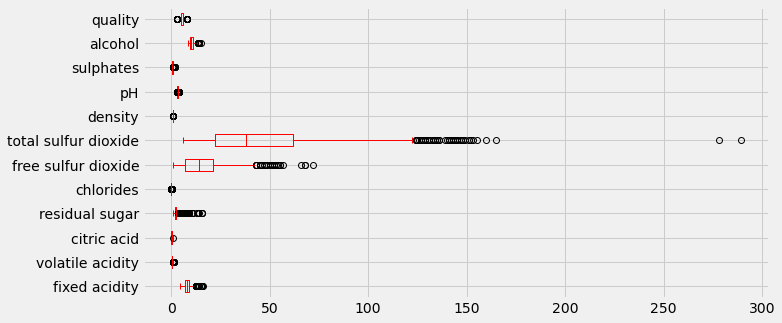

In [336]:
df.plot(kind='box',color='r',vert = False,figsize =(10,5))    #Box Plot

# Correcting the Outliers

In [337]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(1599, 12)

In [338]:
threshold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [339]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(1599, 12)
(1451, 12)


## Percentage of Data Loss after Outliers Removal

In [340]:
loss_percent=(1451-1599)/1599*100
print(loss_percent)

-9.255784865540964


# Critical Observation ::  As because Data Loss is much Higher we will Not Remove Outliers.

# Feature Selection

In [341]:
# Create Classification version of target variable
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]# Separate feature variables and target variable
X = df.drop(['quality','goodquality'], axis = 1)
Y = df['goodquality']

In [342]:
# See proportion of good vs bad wines
df['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

In [343]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [344]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: goodquality, Length: 1599, dtype: int64

# Skewness Checking of the Data

In [345]:
X.skew(axis = 0, skipna = True)

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

##### The rule of thumb seems to be:
If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.

If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed.

If the skewness is less than -1 or greater than 1, the data are highly skewed.

# Skewness Removal

In [346]:
from sklearn.preprocessing import power_transform
X=power_transform(X,method='yeo-johnson')

In [347]:
X

array([[-4.42665887e-01,  9.95541630e-01, -1.53110932e+00, ...,
         1.27568966e+00, -5.81649810e-01, -1.07502528e+00],
       [-1.61307687e-01,  1.77129874e+00, -1.53110932e+00, ...,
        -7.09517443e-01,  3.95139954e-01, -5.00859824e-01],
       [-1.61307687e-01,  1.26980139e+00, -1.25535866e+00, ...,
        -3.10054090e-01,  1.83771552e-01, -5.00859824e-01],
       ...,
       [-1.36436736e+00,  3.87059824e-04, -6.83293826e-01, ...,
         7.18868608e-01,  8.20841495e-01,  7.34557283e-01],
       [-1.76745837e+00,  7.28552768e-01, -7.43826364e-01, ...,
         1.63859531e+00,  5.88343819e-01, -1.88002120e-02],
       [-1.66263981e+00, -1.32045850e+00,  1.03107021e+00, ...,
         5.29831604e-01,  2.56369273e-01,  7.34557283e-01]])

In [348]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: goodquality, Length: 1599, dtype: int64


# Feature Importance


In [349]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

from sklearn.ensemble import ExtraTreesClassifier
classifiern = ExtraTreesClassifier()
classifiern.fit(X,Y)
score = classifiern.feature_importances_
print(score)

[0.07482669 0.10486435 0.09292928 0.07368029 0.0756258  0.06987355
 0.08317628 0.08624062 0.06851681 0.11142113 0.1588452 ]


# Splitting Dataset

In [350]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

# Using Logistic Regression

In [351]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred_log = model.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(Y_test,Y_pred_log))

Accuracy Score: 0.875


In [352]:
confusion_mat_log = confusion_matrix(Y_test,Y_pred_log)
print(confusion_mat_log)

[[395  22]
 [ 38  25]]


In [353]:
from sklearn.metrics import classification_report
print (classification_report(Y_test,Y_pred_log,digits=2))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       417
           1       0.53      0.40      0.45        63

    accuracy                           0.88       480
   macro avg       0.72      0.67      0.69       480
weighted avg       0.86      0.88      0.87       480



In [354]:
fpr5,tpr5,thresholds = roc_curve(Y_test,Y_pred_log)

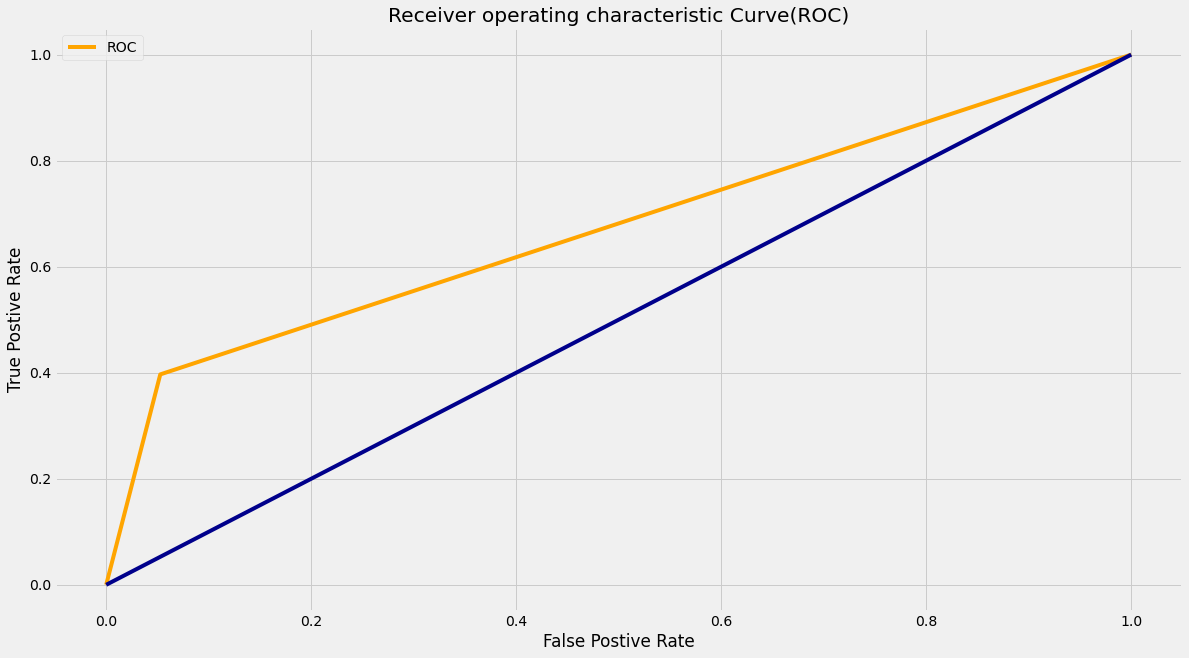

In [355]:
plt.plot(fpr5,tpr5,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue')
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.title('Receiver operating characteristic Curve(ROC)')
plt.legend()
plt.show()

# Using KNN:

In [356]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)
Y_pred_knn = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,Y_pred_knn))

Accuracy Score: 0.8833333333333333


In [357]:
confusion_mat_knn = confusion_matrix(Y_test,Y_pred_knn)
print(confusion_mat_knn)

[[390  27]
 [ 29  34]]


In [358]:
from sklearn.metrics import classification_report
print (classification_report(Y_test,Y_pred_knn,digits=2))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       417
           1       0.56      0.54      0.55        63

    accuracy                           0.88       480
   macro avg       0.74      0.74      0.74       480
weighted avg       0.88      0.88      0.88       480



In [359]:
fpr,tpr,thresholds = roc_curve(Y_test,Y_pred_knn)

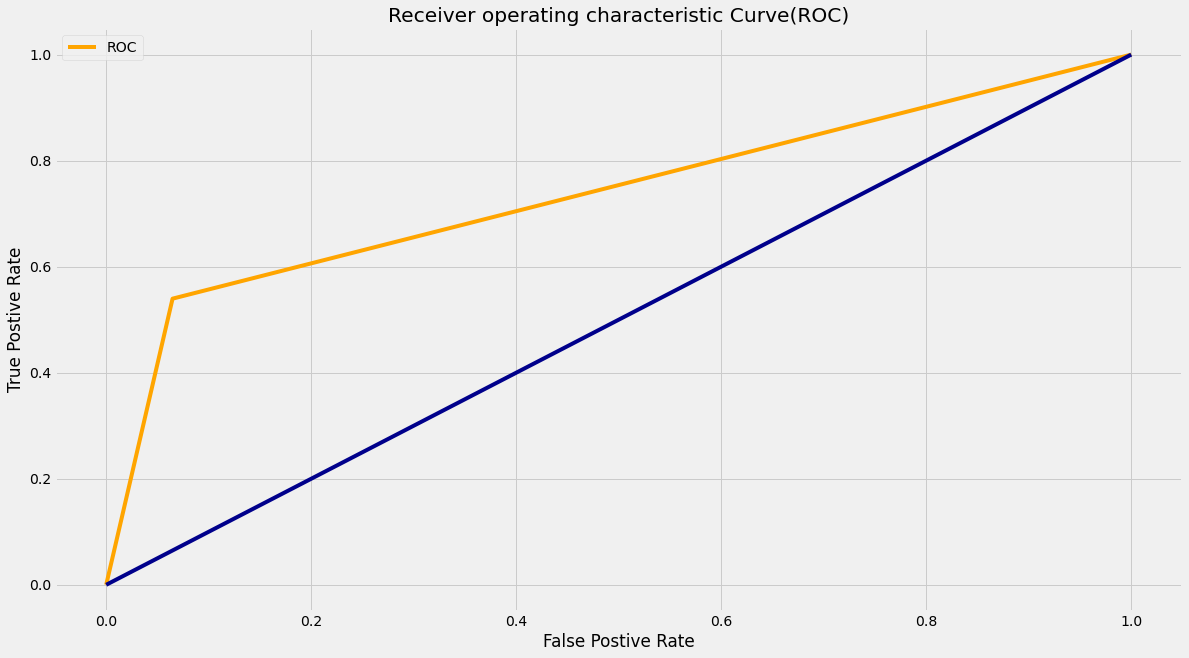

In [360]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue')
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.title('Receiver operating characteristic Curve(ROC)')
plt.legend()
plt.show()

# Using SVC:

In [361]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
model = SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
model.fit(X_train,Y_train)
Y_pred_svc = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,Y_pred_svc))

Accuracy Score: 0.88125


In [362]:
confusion_mat_svc= confusion_matrix(Y_test,Y_pred_svc)
print(confusion_mat_svc)

[[405  12]
 [ 45  18]]


In [363]:
from sklearn.metrics import classification_report
print (classification_report(Y_test,Y_pred_svc,digits=2))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       417
           1       0.60      0.29      0.39        63

    accuracy                           0.88       480
   macro avg       0.75      0.63      0.66       480
weighted avg       0.86      0.88      0.86       480



In [364]:
fpr1,tpr1,thresholds = roc_curve(Y_test,Y_pred_svc)

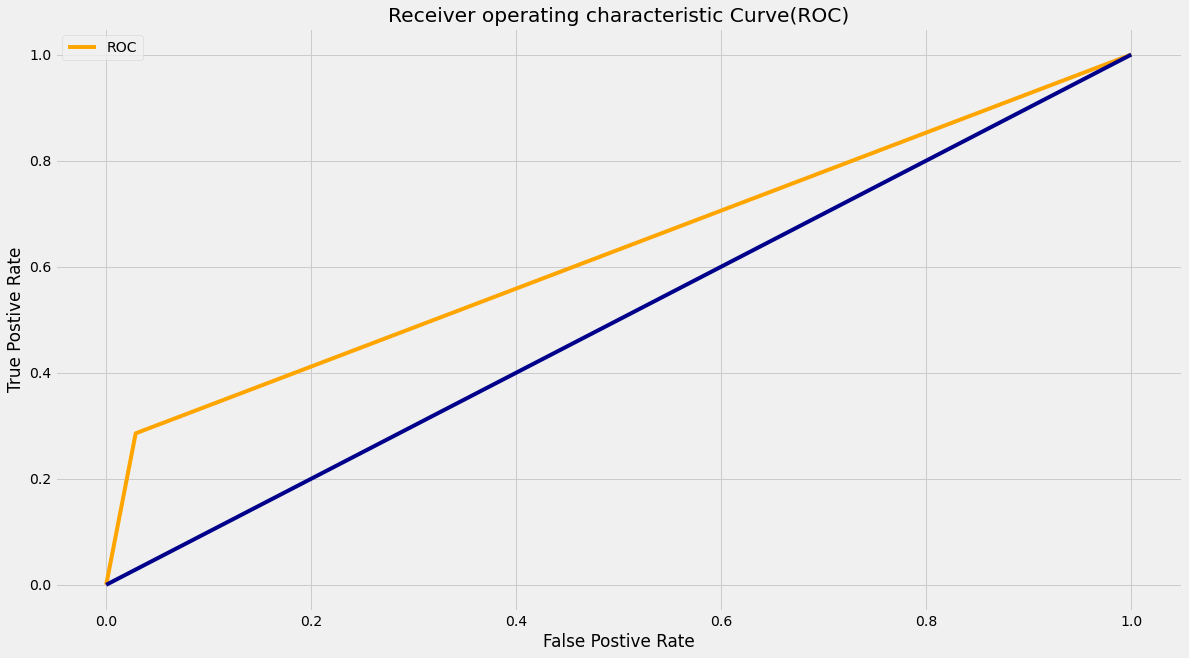

In [365]:
plt.plot(fpr1,tpr1,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue')
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.title('Receiver operating characteristic Curve(ROC)')
plt.legend()
plt.show()

# Using Decision Tree:

In [366]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',random_state=7)
model.fit(X_train,Y_train)
Y_pred_dt = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,Y_pred_dt))

Accuracy Score: 0.86875


In [367]:
confusion_mat_dt= confusion_matrix(Y_test,Y_pred_dt)
print(confusion_mat_dt)

[[381  36]
 [ 27  36]]


In [368]:
from sklearn.metrics import classification_report
print (classification_report(Y_test,Y_pred_dt,digits=2))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       417
           1       0.50      0.57      0.53        63

    accuracy                           0.87       480
   macro avg       0.72      0.74      0.73       480
weighted avg       0.88      0.87      0.87       480



In [369]:
fpr2,tpr2,thresholds = roc_curve(Y_test,Y_pred_dt)

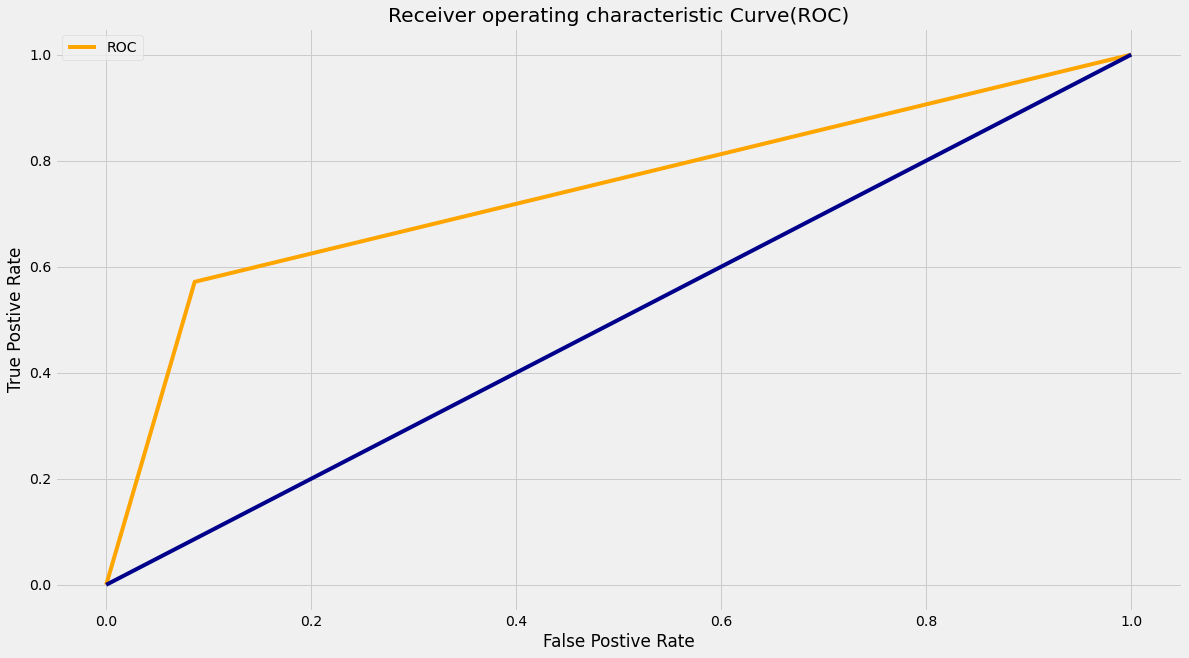

In [370]:
plt.plot(fpr2,tpr2,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue')
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.title('Receiver operating characteristic Curve(ROC)')
plt.legend()
plt.show()

# Using GaussianNB:

In [373]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.model__var_smoothing=[1e-09]
model3.fit(X_train,Y_train)
Y_pred_gnb = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,Y_pred_gnb))

Accuracy Score: 0.8416666666666667


In [374]:
confusion_mat_gnb= confusion_matrix(Y_test,Y_pred_gnb)
print(confusion_mat_gnb)

[[360  57]
 [ 19  44]]


In [375]:
from sklearn.metrics import classification_report
print (classification_report(Y_test,Y_pred_gnb,digits=2))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90       417
           1       0.44      0.70      0.54        63

    accuracy                           0.84       480
   macro avg       0.69      0.78      0.72       480
weighted avg       0.88      0.84      0.86       480



In [376]:
fpr3,tpr3,thresholds = roc_curve(Y_test,Y_pred_gnb)

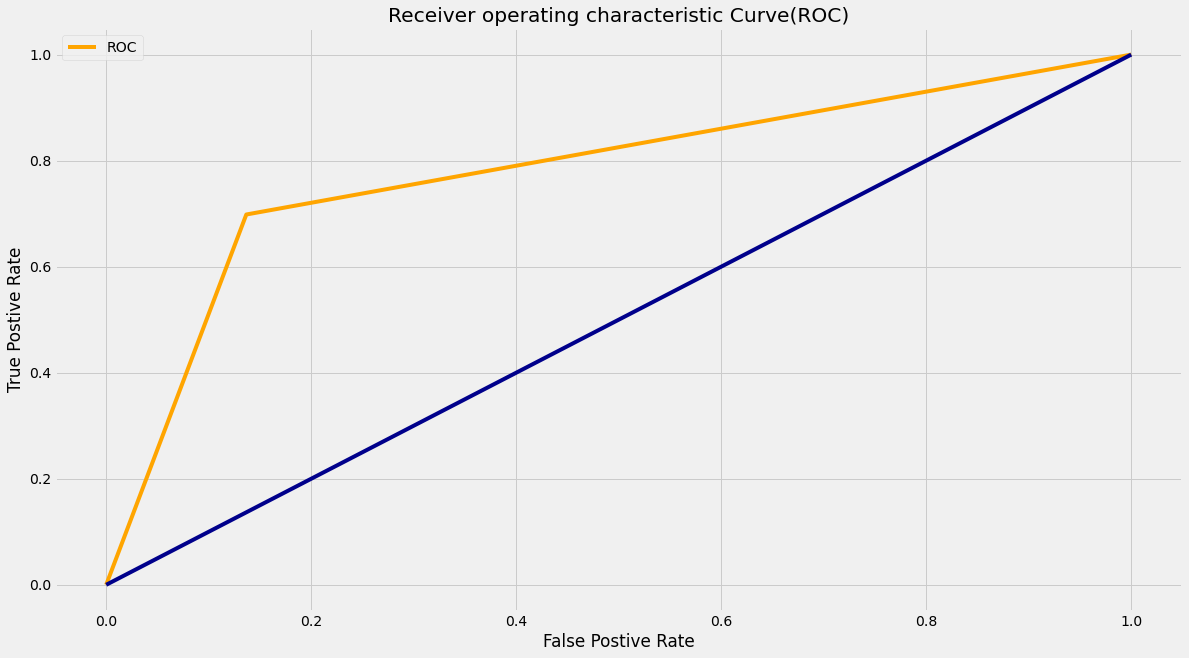

In [377]:
plt.plot(fpr3,tpr3,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue')
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.title('Receiver operating characteristic Curve(ROC)')
plt.legend()
plt.show()

In [378]:
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit


pca = PCA()
model = GaussianNB()
steps = [('pca', pca), ('model', model)]
pipeline = Pipeline(steps)

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
# get the default parameters of your model and use them as a param_grid
modelwithpca = GridSearchCV(pipeline, param_grid={'model__' + k: [v] for k, v in model.get_params().items()}, cv=cv)

# will run 5 times as your cv is configured
modelwithpca.fit(X_test,Y_test)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('model', GaussianNB())]),
             param_grid={'model__priors': [None],
                         'model__var_smoothing': [1e-09]})

In [379]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.model__var_smoothing=[1e-09]
model3.fit(X_train,Y_train)
Y_pred_gnb = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,Y_pred_gnb))

Accuracy Score: 0.8416666666666667


# Using Random Forest:

In [380]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, Y_train)
Y_pred_rf = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,Y_pred_rf))

Accuracy Score: 0.8916666666666667


In [381]:
confusion_mat_rf= confusion_matrix(Y_test,Y_pred_rf)
print(confusion_mat_rf)

[[395  22]
 [ 30  33]]


In [382]:
from sklearn.metrics import classification_report
print (classification_report(Y_test,Y_pred_rf,digits=2))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       417
           1       0.60      0.52      0.56        63

    accuracy                           0.89       480
   macro avg       0.76      0.74      0.75       480
weighted avg       0.89      0.89      0.89       480



In [383]:
fpr4,tpr4,thresholds = roc_curve(Y_test,Y_pred_rf)

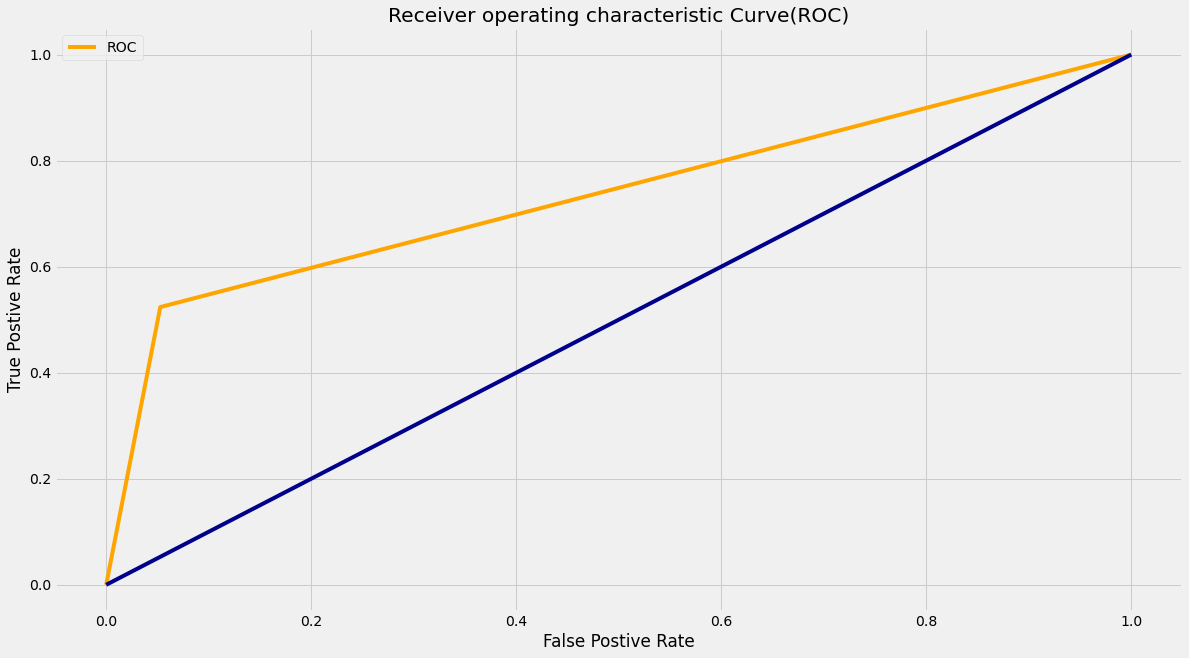

In [384]:
plt.plot(fpr4,tpr4,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue')
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.title('Receiver operating characteristic Curve(ROC)')
plt.legend()
plt.show()

In [385]:
import pandas as pd

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn import metrics

import warnings

warnings.filterwarnings('ignore')


rfc = RandomForestClassifier()

forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

clf.fit(X_test, Y_test)

print(clf.best_params_)

print(clf.best_score_)

{'max_depth': 12, 'max_features': 2}
0.9


In [386]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1,max_depth=13,max_features=3)
model2.fit(X_train, Y_train)
Y_pred_rf1 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,Y_pred_rf))

Accuracy Score: 0.8916666666666667


# So Random Forest is the Best

# Cross Validation Score

In [387]:
pred_log_reg=log_reg.predict(X_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(Y_test,Y_pred_rf)
for j in range(2,10):
    lsscore=cross_val_score(log_reg,X_test,Y_test,cv=j)
    lsc=lsscore.mean()
    print("At cv:-",j)
    print("Cross Validation Score is:-",lsc*100)
    print("accuracy_score is:-",lss*100)
    print("\n")
    

At cv:- 2
Cross Validation Score is:- 88.95833333333334
accuracy_score is:- 89.16666666666667


At cv:- 3
Cross Validation Score is:- 88.33333333333333
accuracy_score is:- 89.16666666666667


At cv:- 4
Cross Validation Score is:- 87.70833333333333
accuracy_score is:- 89.16666666666667


At cv:- 5
Cross Validation Score is:- 88.33333333333334
accuracy_score is:- 89.16666666666667


At cv:- 6
Cross Validation Score is:- 87.91666666666667
accuracy_score is:- 89.16666666666667


At cv:- 7
Cross Validation Score is:- 88.12264036049203
accuracy_score is:- 89.16666666666667


At cv:- 8
Cross Validation Score is:- 87.91666666666667
accuracy_score is:- 89.16666666666667


At cv:- 9
Cross Validation Score is:- 87.51455858374099
accuracy_score is:- 89.16666666666667




# Model Saving

In [388]:
import pickle
filename= 'Rewine Quality Prediction.pkl'
pickle.dump(log_reg,open (filename,'wb'))